In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Dataset

#### Msoud Nickparvar. (2021). Brain Tumor MRI Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/2645886


In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:05<00:00, 28.1MB/s]
100% 149M/149M [00:05<00:00, 31.0MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths =[]

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
     # Iterate through images in the label directory
     for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

      # Append the image path to the paths list
        classes.append(label)
        class_paths.append(image_path)

  # Create a Dataframe with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [ ]:
tr_df = get_class_paths('/content/Training')

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0140.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0514.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0311.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_1174.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0594.jpg,pituitary
...,...,...
5707,/content/Training/glioma/Tr-gl_0436.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0859.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0753.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0733.jpg,glioma


In [ ]:
ts_df = get_class_paths('/content/Testing')

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0132.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0059.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0099.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0040.jpg,pituitary
...,...,...
1306,/content/Testing/glioma/Te-gl_0169.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0271.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0206.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0085.jpg,glioma


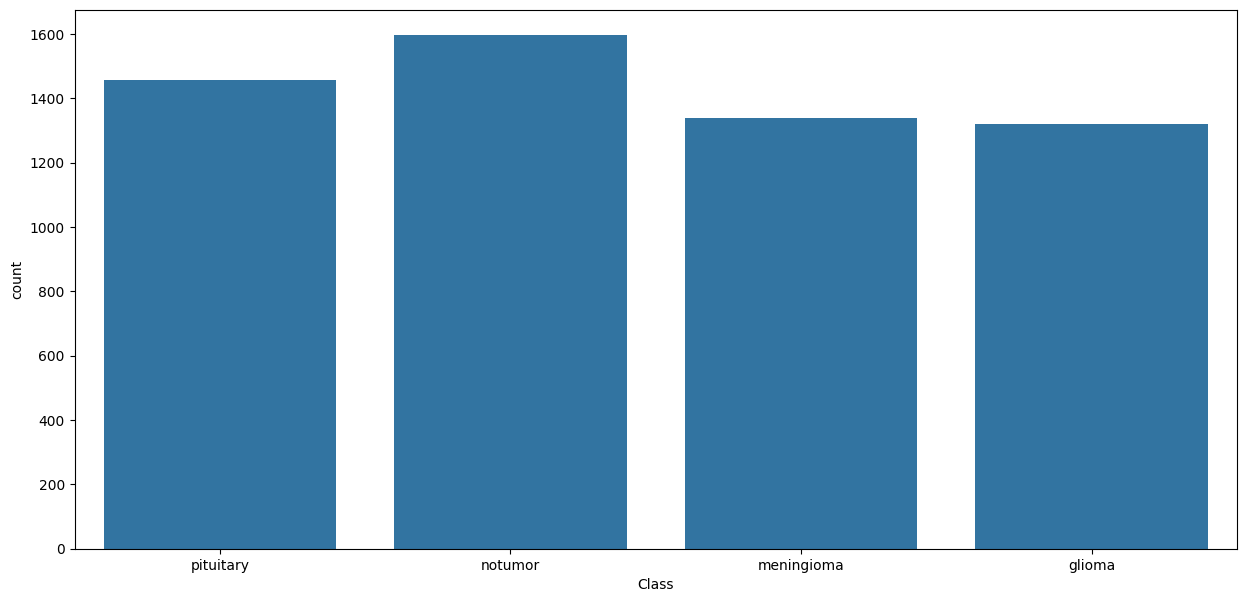

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

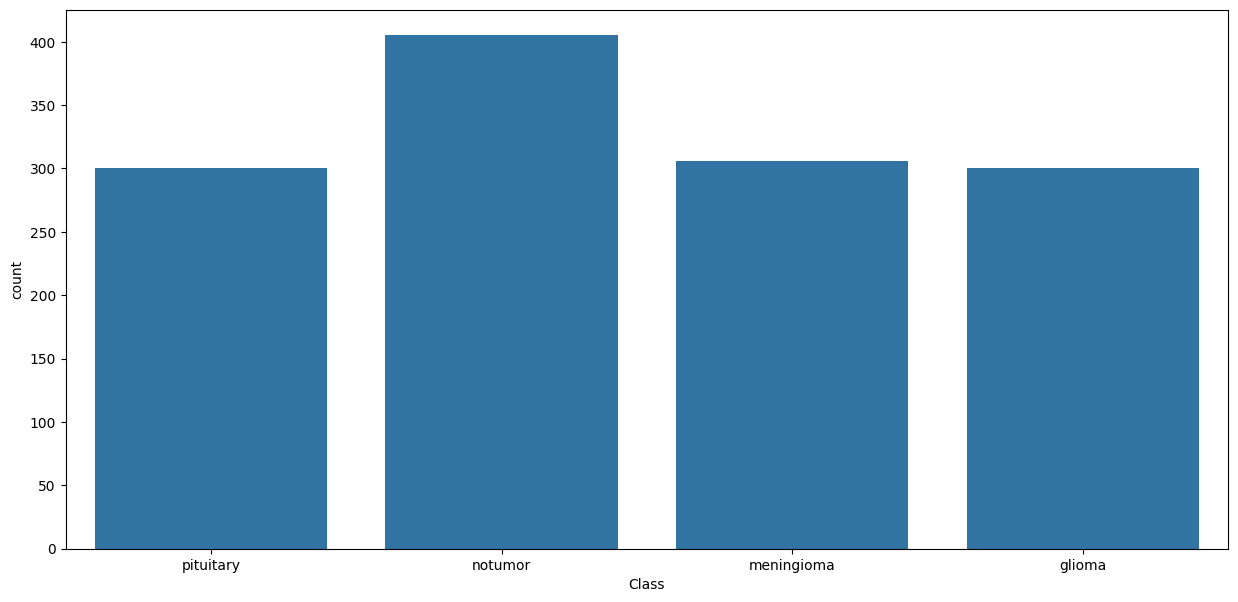

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
17,/content/Testing/pituitary/Te-piTr_0007.jpg,pituitary
1149,/content/Testing/glioma/Te-gl_0298.jpg,glioma
1306,/content/Testing/glioma/Te-gl_0169.jpg,glioma
795,/content/Testing/meningioma/Te-me_0256.jpg,meningioma
33,/content/Testing/pituitary/Te-pi_0086.jpg,pituitary
...,...,...
1275,/content/Testing/glioma/Te-gl_0236.jpg,glioma
1252,/content/Testing/glioma/Te-gl_0120.jpg,glioma
954,/content/Testing/meningioma/Te-me_0047.jpg,meningioma
454,/content/Testing/notumor/Te-no_0132.jpg,notumor


In [ ]:
ts_df

,Class Path,Class
678,/content/Testing/notumor/Te-no_0019.jpg,notumor
1034,/content/Testing/glioma/Te-gl_0128.jpg,glioma
59,/content/Testing/pituitary/Te-pi_0292.jpg,pituitary
77,/content/Testing/pituitary/Te-pi_0051.jpg,pituitary
1170,/content/Testing/glioma/Te-gl_0089.jpg,glioma
...,...,...
527,/content/Testing/notumor/Te-no_0037.jpg,notumor
495,/content/Testing/notumor/Te-no_0250.jpg,notumor
201,/content/Testing/pituitary/Te-piTr_0000.jpg,pituitary
1116,/content/Testing/glioma/Te-gl_0233.jpg,glioma


## Data Preprocessing


In [ ]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
    )

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
    )

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


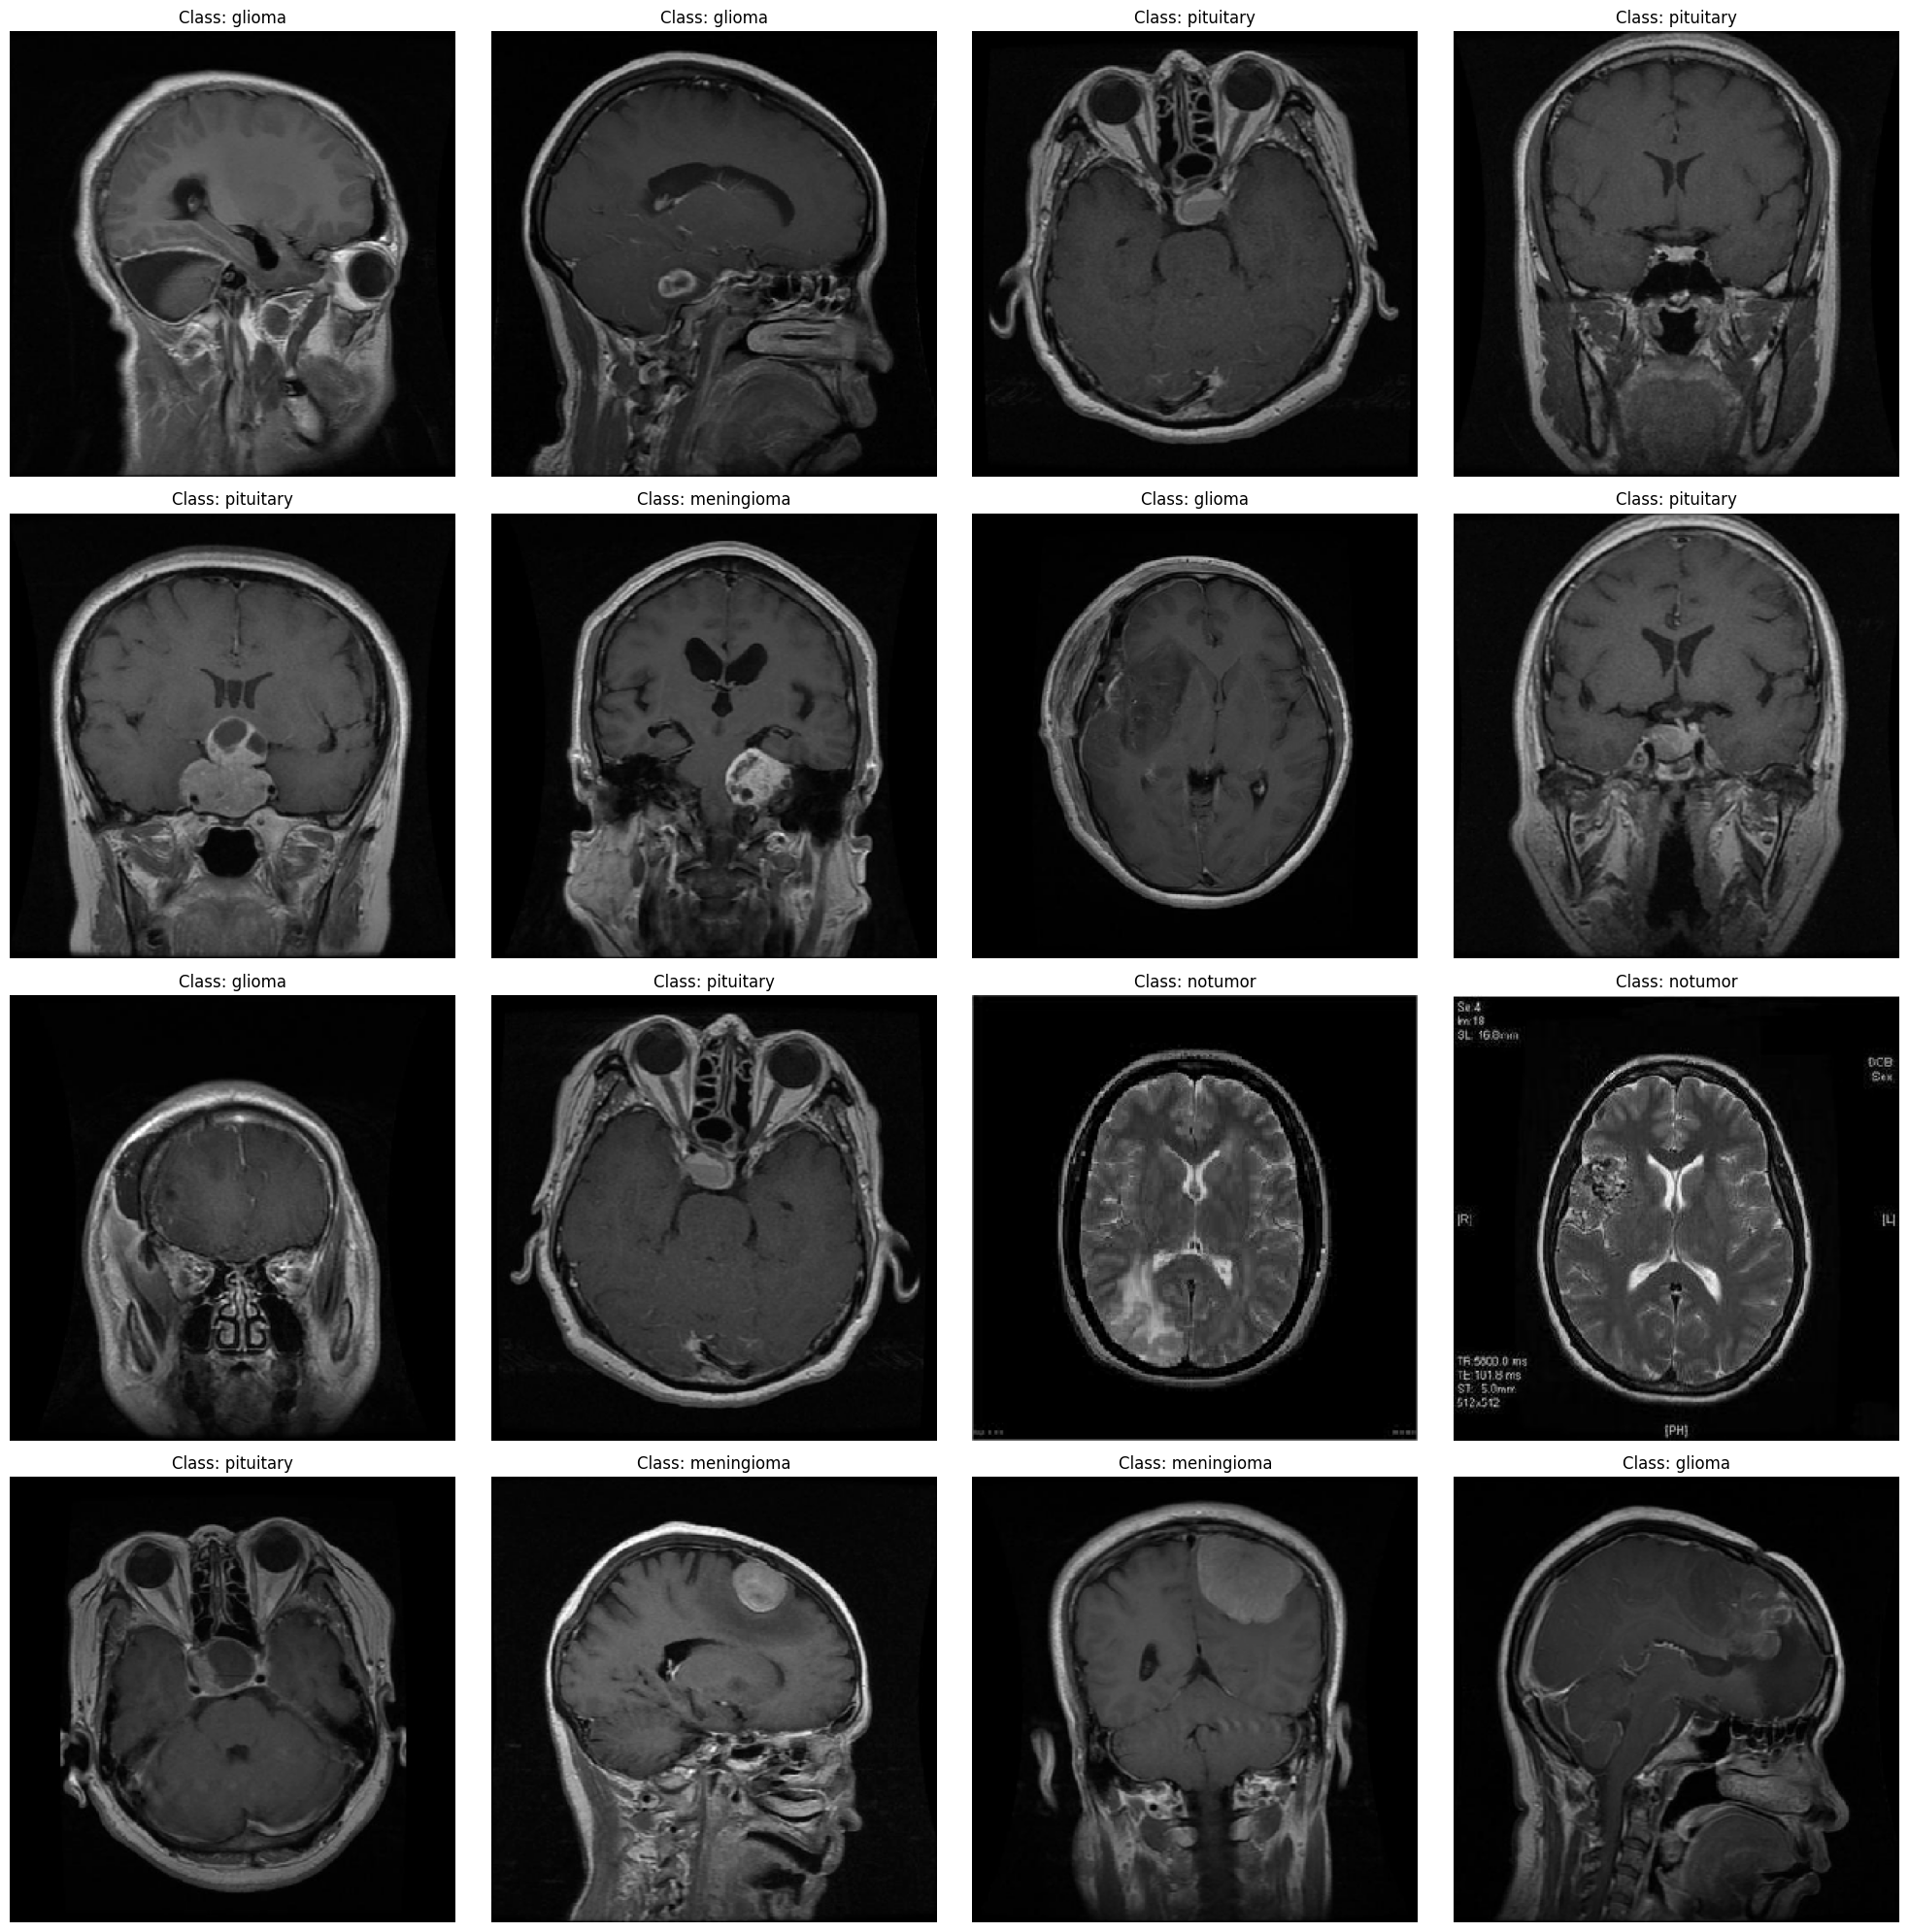

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    # plt.title(label)
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class index in the list of indices
    index_positions = class_indices.index(class_index)

    # Get the corresponding class name
    class_name = class_names[index_positions]

    plt.title(f'Class: {class_name}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Xception Model

### Developed by Francois Chollet at Google

#### The model works by breaking down the image into smaller, easier-to-understand parts, and then looks at those parts one by one.

#### Just like if you were to focus on parts of an animal like the fur, eyes, or paws before deciding what animal you're looking at.


### Dataset Used

Xception was trained on ImageNet, a large and popular dataset in the computer vision community. ImageNet contains over 14 million images categorized into 1,000 different categories. These images include everything from animals like dogs and cats to objects like cars, and plants.


### Training Process

The model was shown millions of images from the ImageNet dataset, and for each image, it was told what the image was. Over time, Exception learned patterns and features that different objects (like the stripes of a tiger, or the circular shape of a car's tire)

The training process involves a lot of trial and error. In the beginning, the model might make mistakes, but after each mistake, it adjusts(or learns) a little bit to improve its accuracy. This is done using a process called backpropagation and optimization techiniques like Stochastic Gradient Descent (SGD).


In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(input_shape=img_shape, include_top=False, weights='imagenet', pooling='max')

model = Sequential([
     base_model,
     Flatten(),
     Dropout(0.3),
     Dense(128, activation='relu'),
     Dropout(0.25),
     Dense(4, activation='softmax')
    ]
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.7914 - loss: 0.6251 - precision: 0.8400 - recall: 0.7101 - val_accuracy: 0.9450 - val_loss: 0.1555 - val_precision: 0.9493 - val_recall: 0.9435
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 139s 767ms/step - accuracy: 0.9783 - loss: 0.0624 - precision: 0.9794 - recall: 0.9772 - val_accuracy: 0.9527 - val_loss: 0.1430 - val_precision: 0.9555 - val_recall: 0.9511
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 764ms/step - accuracy: 0.9898 - loss: 0.0280 - precision: 0.9908 - recall: 0.9896 - val_accuracy: 0.9603 - val_loss: 0.1122 - val_precision: 0.9603 - val_recall: 0.9603
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 767ms/step - accuracy: 0.9972 - loss: 0.0083 - precision: 0.9975 - recall: 0.9971 - val_accuracy: 0.9832 - val_loss: 0.0604 - val_precision: 0.9832 - val_recall: 0.9817
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 767ms/step - accuracy: 0.9988 - loss: 0.0049 - precision: 0.9991 - recall: 0.9988 - val_accuracy: 0.9725 - 

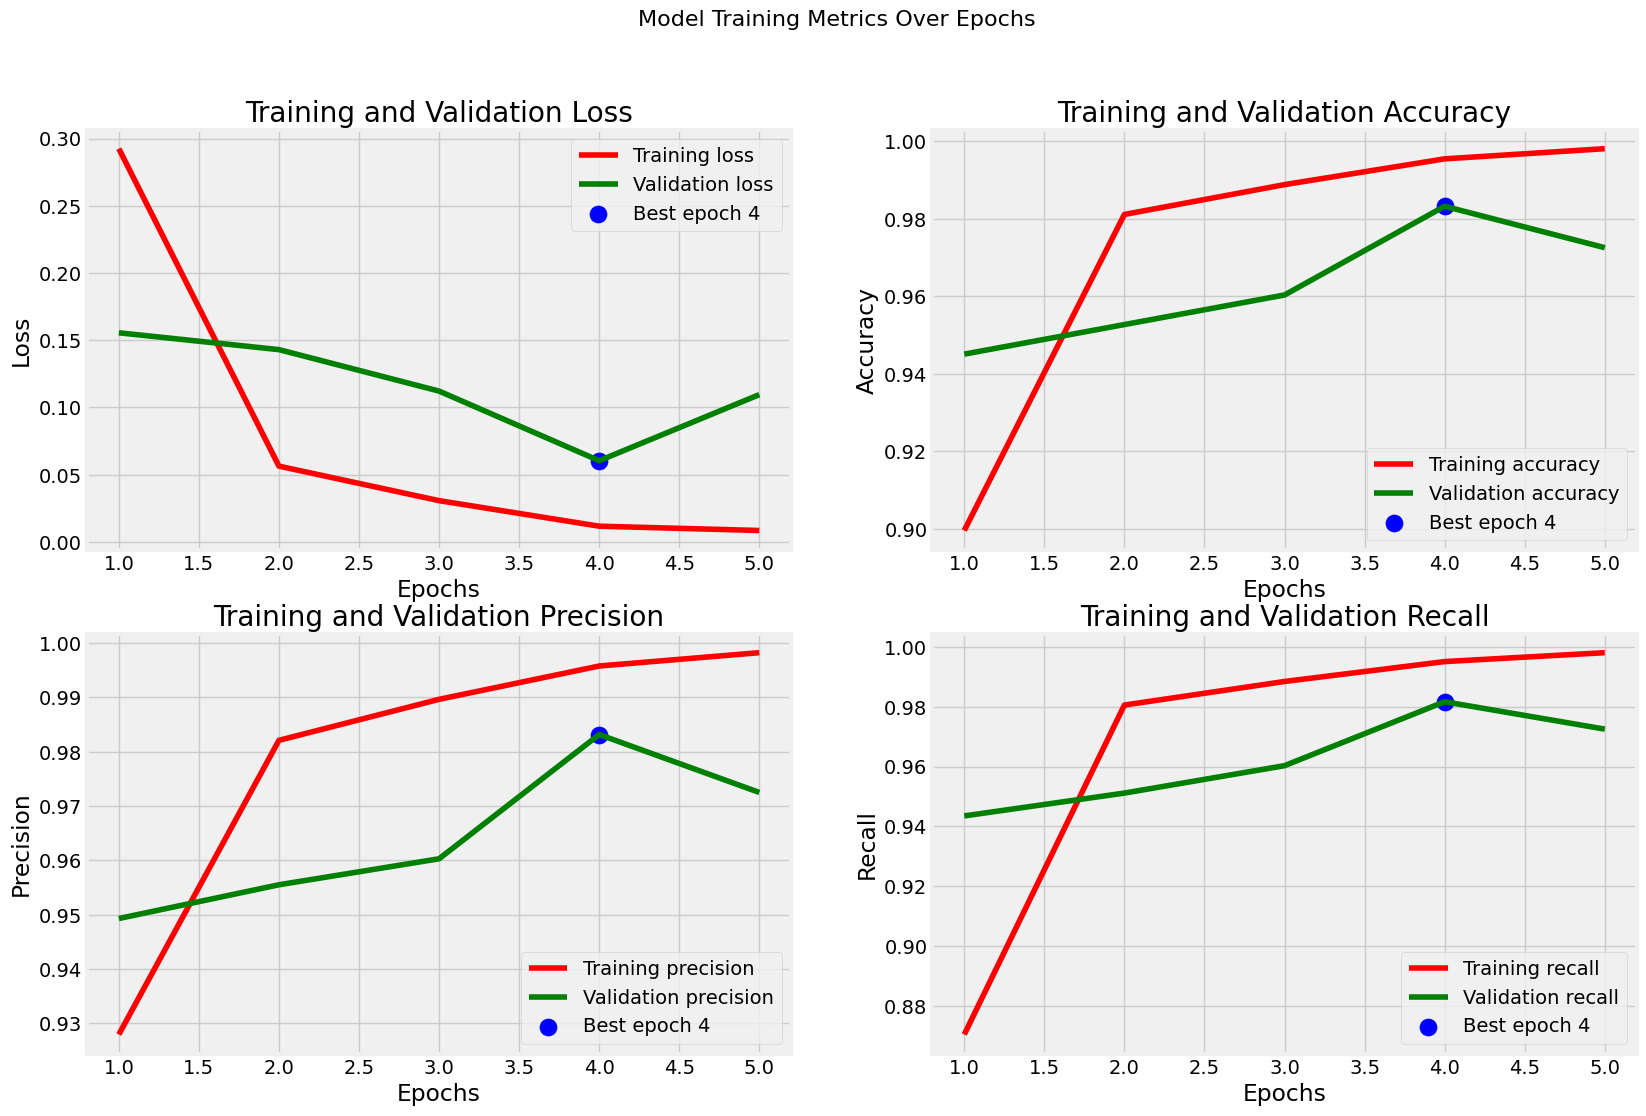

In [ ]:
# Get training and validation metrics from history
metrics = ['loss', 'accuracy', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# PLot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch {best_epochs[metric]}')
    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f'Validation Loss: {valid_score[0]:.4f}')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Test Loss: {test_score[0]:.4f}')
# print(f'Train Precision: {train_score[2]}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 240ms/step - accuracy: 0.9922 - loss: 0.0296 - precision: 0.9922 - recall: 0.9922
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9677 - loss: 0.1326 - precision: 0.9677 - recall: 0.9677
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9876 - loss: 0.0593 - precision: 0.9876 - recall: 0.9876
Train Accuracy: 99.28%
Train Loss: 0.0236


Validation Accuracy: 97.25%
Validation Loss: 0.1096


Test Accuracy: 98.02%
Test Loss: 0.0718


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step


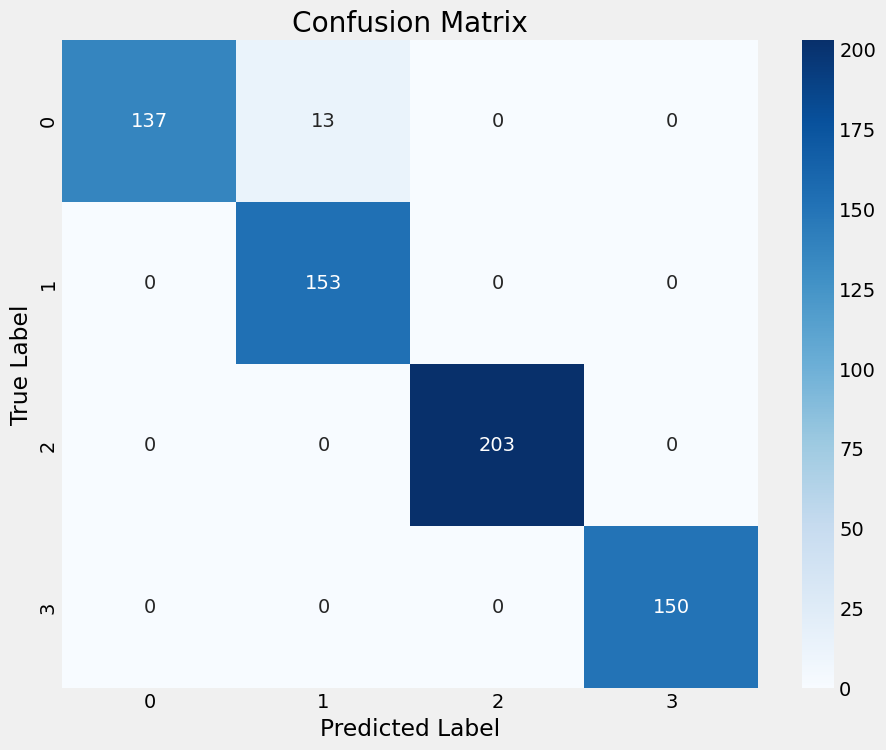

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cn = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cn, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> str:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess the image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.array(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(predictions)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f'Input MRI Image\nPredicted : {predicted_class}')
    # plt.axis('off

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel('Probability', fontsize=15)
    plt.title('Class Probabilities')

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.tight_layout()
    plt.show()

    print(f'Predicted tumor type: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


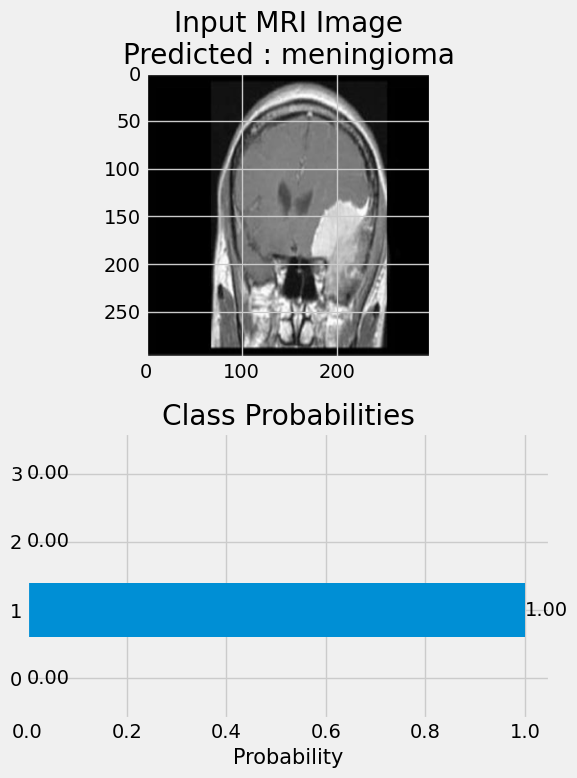

Predicted tumor type: meningioma


In [ ]:
predict('/content/Testing/meningioma/Te-meTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


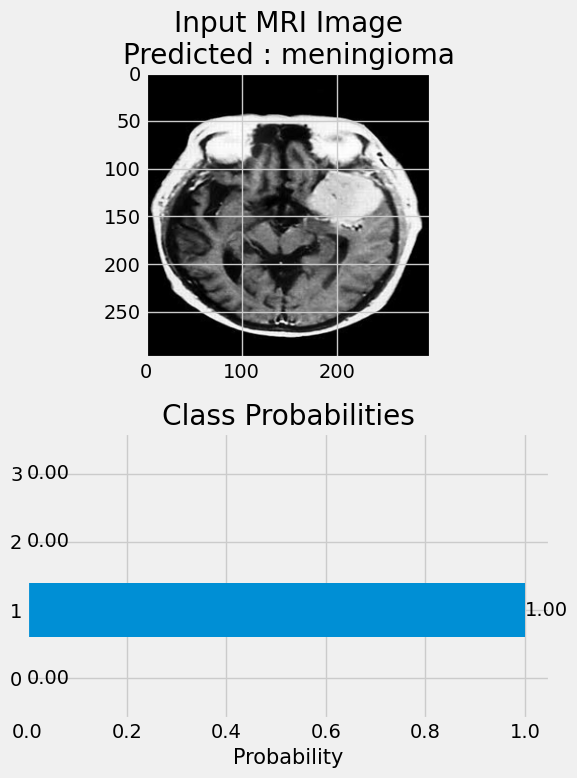

Predicted tumor type: meningioma


In [ ]:
predict('/content/Testing/meningioma/Te-meTr_0005.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


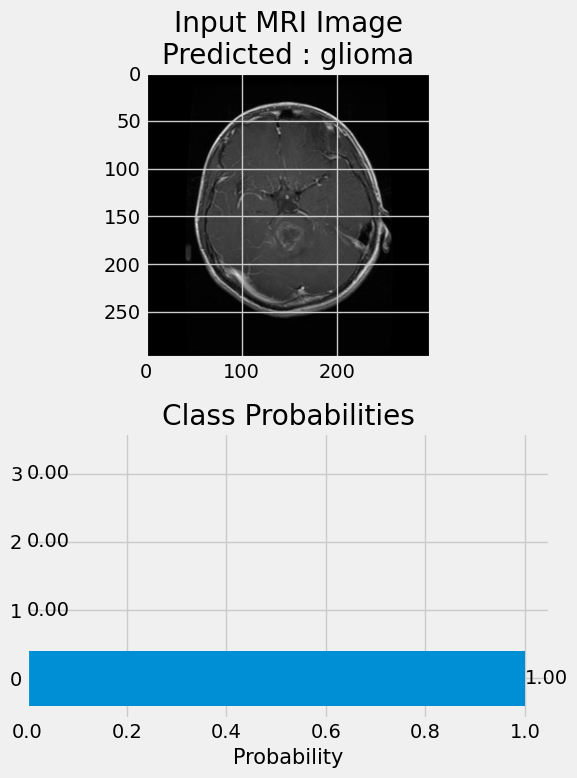

Predicted tumor type: glioma


In [ ]:
predict('/content/Testing/glioma/Te-glTr_0007.jpg')

In [ ]:
model.save_weights('xception_model.weights.h5')

### Train a custom CNN

has fewer convolutional layers


### Xception Model

- 36 Convolutional Layers
- 21 million parameters
- 99% Accuracy

#### vs

### Custom CNN Model

- 4 Convolutional Layers
- 4.7 million parameters
- Goal: Achieve 90+% Accuracy


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
    )

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
    )

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
# Create a Sequential model

cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=8, validation_data=valid_gen)

Epoch 1/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 328ms/step - accuracy: 0.5450 - loss: 2.2905 - precision_1: 0.6693 - recall_1: 0.3503 - val_accuracy: 0.7160 - val_loss: 0.9855 - val_precision_1: 0.7725 - val_recall_1: 0.6168
Epoch 2/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 104s 290ms/step - accuracy: 0.8026 - loss: 0.7939 - precision_1: 0.8295 - recall_1: 0.7530 - val_accuracy: 0.8046 - val_loss: 0.7096 - val_precision_1: 0.8230 - val_recall_1: 0.7664
Epoch 3/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 139s 282ms/step - accuracy: 0.8459 - loss: 0.5927 - precision_1: 0.8604 - recall_1: 0.8226 - val_accuracy: 0.8473 - val_loss: 0.5292 - val_precision_1: 0.8605 - val_recall_1: 0.8290
Epoch 4/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 102s 284ms/step - accuracy: 0.8826 - loss: 0.4685 - precision_1: 0.8936 - recall_1: 0.8689 - val_accuracy: 0.8687 - val_loss: 0.4926 - val_precision_1: 0.8756 - val_recall_1: 0.8489
Epoch 5/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 102s 285ms/step - accuracy: 0.9065 - loss: 0.3816 - precision_1: 0.9145 - rec

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])


In [ ]:
# Available metrics with the correct names based on history.history keys
metrics = {'loss': 'loss', 'accuracy': 'accuracy', 'precision': 'precision_2', 'recall': 'recall_2'}
val_metrics_keys = {m: f'val_{metrics[m]}' for m in metrics}

# Get training and validation metrics
tr_metrics = {m: history.history[metrics[m]] for m in metrics}
val_metrics = {m: history.history[val_metrics_keys[m]] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch {best_epochs[metric]}')
    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


KeyError: 'precision_2'

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f'Validation Loss: {valid_score[0]:.4f}')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Test Loss: {test_score[0]:.4f}')
# print(f'Train Precision: {train_score[2]}')

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cn = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cn, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

In [ ]:
cnn_model.save('cnn_model.h5')

## Part 2: Streamlit Web App


In [1]:
!pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [2]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [3]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [4]:
def run_streamlit():
    os.system('streamlit run /content/app.py --server.port 8501')

In [5]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv

load_dotenv()

# Define the output directory for saving images in Google Colab
# output_dir = '/content/saliency_maps'
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):
  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan. The saliency map was generated by a machine learning model that was trained to classify brain tumors as either glioma, meningioma, pituitary, or no tumor.

  The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

  The machine learning model predicted the image to of class "{model_prediction}" with a confidence of {confidence * 100}%.

  In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like "The saliency map highlights the regions the model is focusing on, which are in light cyan" in your explanation.
    - Keep your explanation to 4 sentences max.

  """

  print(prompt)

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])
  print(response.text)

  return response.text

def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    # Convert the input image to a tensor
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    # Make a prediction
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  # Calculate the gradients
  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  # Normalize the gradients
  gradients = tf.reduce_max(gradients, axis=1)
  gradients = gradients.numpy().squeeze()


  # Resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  # Create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  # Apply mask to gradients
  gradients = gradients * mask

  # Normalize only the brain area]
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients


  # Apply a higher threshold
  threshold = np.percentile[mask]
  gradients[gradients < threshold] = 0

  # Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  # Create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  # Resize heatmap to match original image size
  heatmap = cv2.resize(heatmap, img_size)

  # Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, 'wb') as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img



def load_xception_model(model_path):
    img_shape = (299, 299, 3)
    base_model = tf.keras.applications.Xception(input_shape=img_shape, include_top=False, weights='imagenet', pooling='max')

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    # Compile the model
    model.compile(Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           Precision(),
                           Recall()])

    model.load_weights(model_path)

    return model

st.title('Brain Tumor Classification')

st.write('Upload a brain MRI image to classify the tumor type.')

uploaded_file = st.file_uploader('Choose an image...', type=['jpg', 'jpeg', 'png'])


if uploaded_file is not None:
    # Display the uploaded image
    # st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    selected_model = st.radio(
        'Select Model', ['Xception', 'Custom CNN']
    )

    if selected_model == 'Xception':
        model = load_xception_model('/content/xception_model.weights.h5')
        img_size = [299, 299]
    else:
        model = load_model('/content/cnn_model.h5')
        img_size = [224, 224]


    # Preprocess the image
    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    # Get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]


    st.write(f'Predicted Tumor Type: {result}')
    # st.write(f'Confidence: {prediction[0][class_index] * 100:.2f}%')
    st.write('Prediction Probabilities:')
    for label, prob in zip(labels, prediction[0]):
        st.write(f'{label}: {prob:.4f}%')

    # Generate and display the saliency map
    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

    # Display the saliency map
    # st.image(saliency_map, caption='Saliency Map', use_column_width=True)
    col1, col2 = st.columns(2)
    with col1:
        st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    with col2:
        st.image(saliency_map, caption='Saliency Map', use_column_width=True)

    # Display the result
    st.write("## Classification Results")
    # Create a visually distinct section
    result_container = st.container()
    # Create a visually distinct section with black background
    result_container = st.container()
    result_container.markdown(
         f"""
        <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
            <div style="display: flex; justify-content: space-between; align-items: center;">
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
                        {result}
                    </p>
                </div>
                <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                        {prediction[0][class_index]:.4%}
                    </p>
                </div>
            </div>
        </div>
        """,
        unsafe_allow_html=True
    )

    # Prepare data for Plotly chart
    probabilities = prediction[0]
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    # Create a Plotly bar chart
    fig = go.Figure(go.Bar(
        x=sorted_probabilities,
        y=sorted_labels,
        orientation='h',
        marker_color=['red' if label == result else 'blue' for label in sorted_labels]
    ))

    # Customize the chart layout
    fig.update_layout(
        title='Probabilities for each class',
        xaxis_title='Probability',
        yaxis_title='Class',
        height=400,
        width=600,
        yaxis=dict(autorange="reversed")
    )

    # Add value labels to the bars
    for i, prob in enumerate(sorted_probabilities):
        fig.add_annotation(
            x=prob,
            y=i,
            text=f'{prob:.4f}',
            showarrow=False,
            xanchor='left',
            xshift=5
        )

    # Display the Plotly chart
    st.plotly_chart(fig)

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'
    explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

    st.write("## Explanation")
    st.write(explanation)



Writing app.py


In [6]:
thread = Thread(target=run_streamlit)
thread.start()

Exception in thread Thread-10 (run_streamlit):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-4-bc00e1e457a0>", line 2, in run_streamlit
NameError: name 'os' is not defined


In [7]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print('Public URL:', public_url)


Public URL: NgrokTunnel: "https://f554-35-201-253-93.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# tunnels = ngrok.get_tunnels()
# # tunnels
# for tunnel in tunnels:
#     print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
#     ngrok.disconnect(tunnel.public_url)

In [ ]:
%%writefile .env

GOOGLE_API_KEY=